<a href="https://colab.research.google.com/github/payamfirouzfar/keras/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation , Dense , Flatten , BatchNormalization , Conv2D , MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [ ]:
import itertools
import os
import shutil
import random
import glob
import warnings

In [ ]:
os.chdir("C:/Users/payam/dogs_vs_cats")

In [ ]:
pwd

'C:\\Users\\payam\\dogs_vs_cats'

In [ ]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 2CF6-D2D0

 Directory of C:\Users\payam\dogs_vs_cats

09/17/2021  07:30 PM    <DIR>          .
09/17/2021  07:30 PM    <DIR>          ..
12/12/2017  05:36 PM             6,148 _DS_Store
12/12/2017  06:41 PM            16,880 cat.1.jpg
12/12/2017  07:16 PM            34,315 cat.10.jpg
12/12/2017  06:58 PM            28,377 cat.100.jpg
12/12/2017  06:41 PM             5,944 cat.1000.jpg
12/12/2017  06:42 PM            16,999 cat.1002.jpg
12/12/2017  06:35 PM            41,052 cat.1004.jpg
12/12/2017  06:38 PM            33,372 cat.1005.jpg
12/12/2017  06:34 PM            23,571 cat.1006.jpg
12/12/2017  07:23 PM            25,939 cat.1008.jpg
12/12/2017  07:25 PM            20,397 cat.1009.jpg
12/12/2017  06:57 PM            11,291 cat.101.jpg
12/12/2017  06:35 PM            28,075 cat.1010.jpg
12/12/2017  06:37 PM            25,313 cat.1011.jpg
12/12/2017  06:34 PM            40,256 cat.1012.jpg
12/12/2017  06:31 PM            30,

In [ ]:
if os.path.isdir("train/dog") is False:
    os.makedirs("train/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/dog")
    os.makedirs("valid/cat")
    os.makedirs("test/dog")
    os.makedirs("test/cat")
    for c in random.sample(glob.glob("cat.*"),500):
        shutil.move(c , "train/cat")
    for c in random.sample(glob.glob("dog.*"),500):
        shutil.move(c , "train/dog")
    for c in random.sample(glob.glob("cat.*"),100 ):
        shutil.move(c , "valid/cat")
    for c in random.sample(glob.glob("dog.*"),100):
        shutil.move(c , "valid/dog")
    for c in random.sample(glob.glob("cat.*"),50):
        shutil.move(c , "test/cat")
    for c in random.sample(glob.glob("dog.*"),50 ):
        shutil.move(c , "test/dog") 

12/12/2017  07:14 PM            26,553 cat.1224.jpg
12/12/2017  07:18 PM            23,155 cat.1225.jpg
12/12/2017  07:22 PM            11,545 cat.1226.jpg
12/12/2017  07:18 PM            27,354 cat.1227.jpg
12/12/2017  06:42 PM            22,879 cat.1228.jpg
12/12/2017  06:45 PM            14,137 cat.1229.jpg
12/12/2017  07:08 PM             8,124 cat.123.jpg
12/12/2017  07:14 PM            18,041 cat.1230.jpg
12/12/2017  07:18 PM            21,835 cat.1231.jpg
12/12/2017  07:18 PM            19,379 cat.1233.jpg
12/12/2017  07:29 PM            19,724 cat.1234.jpg
12/12/2017  07:26 PM            16,873 cat.1235.jpg
12/12/2017  06:34 PM            14,150 cat.1238.jpg
12/12/2017  06:31 PM            41,129 cat.1239.jpg
12/12/2017  07:01 PM            13,460 cat.124.jpg
12/12/2017  07:07 PM            15,502 cat.1241.jpg
12/12/2017  07:11 PM            18,384 cat.1242.jpg
12/12/2017  07:14 PM            27,926 cat.1243.jpg
12/12/2017  07:07 PM             8,877 cat.1245.jpg
12/12/2017  07

12/12/2017  07:09 PM            18,804 cat.1452.jpg
12/12/2017  07:08 PM             9,613 cat.1453.jpg
12/12/2017  07:02 PM            24,208 cat.1454.jpg
12/12/2017  07:01 PM            36,962 cat.1455.jpg
12/12/2017  07:05 PM            35,172 cat.1456.jpg
12/12/2017  07:06 PM            25,509 cat.1457.jpg
12/12/2017  06:58 PM            27,004 cat.1458.jpg
12/12/2017  06:57 PM            13,034 cat.1459.jpg
12/12/2017  07:16 PM             2,797 cat.146.jpg
12/12/2017  06:46 PM            23,488 cat.1460.jpg
12/12/2017  06:47 PM             4,237 cat.1461.jpg
12/12/2017  06:51 PM            17,556 cat.1462.jpg
12/12/2017  06:50 PM            17,303 cat.1463.jpg
12/12/2017  06:58 PM            18,287 cat.1464.jpg
12/12/2017  06:57 PM            18,384 cat.1465.jpg
12/12/2017  06:54 PM            26,280 cat.1466.jpg
12/12/2017  06:54 PM            27,057 cat.1467.jpg
12/12/2017  07:01 PM            24,950 cat.1468.jpg
12/12/2017  07:01 PM            18,814 cat.1469.jpg
12/12/2017  0

12/12/2017  06:38 PM            11,446 cat.1983.jpg
12/12/2017  06:34 PM            12,070 cat.1984.jpg
12/12/2017  06:35 PM             4,094 cat.1986.jpg
12/12/2017  07:29 PM            24,009 cat.1988.jpg
12/12/2017  07:27 PM            26,456 cat.1989.jpg
12/12/2017  06:33 PM            15,366 cat.199.jpg
12/12/2017  06:34 PM            25,904 cat.1990.jpg
12/12/2017  06:37 PM            27,256 cat.1993.jpg
12/12/2017  06:44 PM            23,047 cat.1995.jpg
12/12/2017  06:41 PM            17,535 cat.1996.jpg
12/12/2017  06:38 PM            17,541 cat.1997.jpg
12/12/2017  07:15 PM            30,997 cat.1998.jpg
12/12/2017  07:17 PM            23,099 cat.1999.jpg
12/12/2017  07:00 PM            22,363 cat.2000.jpg
12/12/2017  07:03 PM            21,299 cat.2001.jpg
12/12/2017  07:07 PM            27,115 cat.2002.jpg
12/12/2017  07:03 PM             8,326 cat.2003.jpg
12/12/2017  07:14 PM             7,036 cat.2004.jpg
12/12/2017  07:10 PM            24,697 cat.2005.jpg
12/12/2017  0

In [ ]:
os.chdir("../../")

12/12/2017  07:17 PM            23,278 cat.2274.jpg
12/12/2017  07:15 PM             7,386 cat.2275.jpg
12/12/2017  07:18 PM            10,869 cat.2276.jpg
12/12/2017  07:21 PM             6,989 cat.2277.jpg
12/12/2017  06:44 PM            19,126 cat.2278.jpg
12/12/2017  06:42 PM            25,515 cat.228.jpg
12/12/2017  06:35 PM            19,982 cat.2280.jpg
12/12/2017  06:34 PM            37,331 cat.2282.jpg
12/12/2017  06:32 PM            22,227 cat.2283.jpg
12/12/2017  06:42 PM            33,269 cat.2286.jpg
12/12/2017  07:21 PM            29,699 cat.2288.jpg
12/12/2017  07:18 PM            14,334 cat.2289.jpg
12/12/2017  06:44 PM            24,901 cat.229.jpg
12/12/2017  06:41 PM            25,102 cat.2290.jpg
12/12/2017  06:39 PM            12,460 cat.2291.jpg
12/12/2017  06:42 PM            20,275 cat.2292.jpg
12/12/2017  06:44 PM            17,454 cat.2293.jpg
12/12/2017  06:35 PM            29,687 cat.2294.jpg
12/12/2017  06:37 PM            23,176 cat.2295.jpg
12/12/2017  06

12/12/2017  06:53 PM            30,374 cat.2609.jpg
12/12/2017  06:55 PM             5,864 cat.261.jpg
12/12/2017  07:05 PM            26,036 cat.2610.jpg
12/12/2017  07:01 PM            17,901 cat.2612.jpg
12/12/2017  07:08 PM            25,639 cat.2614.jpg
12/12/2017  07:09 PM            27,673 cat.2615.jpg
12/12/2017  07:13 PM            30,130 cat.2616.jpg
12/12/2017  06:50 PM            24,213 cat.2618.jpg
12/12/2017  06:51 PM            25,171 cat.2619.jpg
12/12/2017  06:59 PM            25,510 cat.262.jpg
12/12/2017  06:54 PM            25,958 cat.2620.jpg
12/12/2017  06:53 PM            14,737 cat.2621.jpg
12/12/2017  06:57 PM            15,729 cat.2622.jpg
12/12/2017  06:58 PM            14,121 cat.2623.jpg
12/12/2017  06:50 PM            18,732 cat.2624.jpg
12/12/2017  06:51 PM            26,568 cat.2625.jpg
12/12/2017  06:47 PM            14,060 cat.2626.jpg
12/12/2017  07:08 PM            17,405 cat.2628.jpg
12/12/2017  07:09 PM            16,973 cat.2629.jpg
12/12/2017  06

12/12/2017  07:04 PM            27,879 cat.3137.jpg
12/12/2017  06:56 PM            31,705 cat.3138.jpg
12/12/2017  06:59 PM            17,645 cat.3139.jpg
12/12/2017  06:53 PM            17,346 cat.314.jpg
12/12/2017  07:18 PM             5,698 cat.3140.jpg
12/12/2017  07:22 PM            32,730 cat.3141.jpg
12/12/2017  07:17 PM            29,329 cat.3142.jpg
12/12/2017  07:23 PM            20,201 cat.3145.jpg
12/12/2017  07:26 PM            23,880 cat.3146.jpg
12/12/2017  07:29 PM             9,435 cat.3147.jpg
12/12/2017  06:37 PM             3,314 cat.3148.jpg
12/12/2017  06:35 PM            21,477 cat.3149.jpg
12/12/2017  06:54 PM            28,922 cat.315.jpg
12/12/2017  07:25 PM            35,415 cat.3150.jpg
12/12/2017  07:23 PM            14,717 cat.3151.jpg
12/12/2017  07:27 PM            29,776 cat.3152.jpg
12/12/2017  07:29 PM             6,890 cat.3153.jpg
12/12/2017  07:18 PM            10,420 cat.3154.jpg
12/12/2017  07:21 PM            29,274 cat.3155.jpg
12/12/2017  07

12/12/2017  07:06 PM            27,769 cat.443.jpg
12/12/2017  07:12 PM            18,896 cat.444.jpg
12/12/2017  07:13 PM            17,190 cat.445.jpg
12/12/2017  07:09 PM            13,739 cat.446.jpg
12/12/2017  07:08 PM            22,178 cat.447.jpg
12/12/2017  06:46 PM            25,591 cat.448.jpg
12/12/2017  06:47 PM             9,486 cat.449.jpg
12/12/2017  06:51 PM            16,254 cat.45.jpg
12/12/2017  07:12 PM            17,906 cat.450.jpg
12/12/2017  07:13 PM            22,306 cat.451.jpg
12/12/2017  07:08 PM             3,084 cat.453.jpg
12/12/2017  07:01 PM            22,107 cat.455.jpg
12/12/2017  07:04 PM            24,417 cat.456.jpg
12/12/2017  06:58 PM             9,017 cat.458.jpg
12/12/2017  06:57 PM             7,466 cat.459.jpg
12/12/2017  06:46 PM            12,462 cat.460.jpg
12/12/2017  06:47 PM            13,592 cat.461.jpg
12/12/2017  06:50 PM            20,756 cat.463.jpg
12/12/2017  06:53 PM            27,476 cat.466.jpg
12/12/2017  06:54 PM            

12/12/2017  05:35 PM             7,365 dog.1023.jpg
12/12/2017  05:40 PM            29,172 dog.1024.jpg
12/12/2017  05:44 PM            33,346 dog.1025.jpg
12/12/2017  05:35 PM            20,736 dog.1027.jpg
12/12/2017  06:16 PM             3,115 dog.1028.jpg
12/12/2017  05:54 PM            17,754 dog.103.jpg
12/12/2017  05:40 PM            19,767 dog.1030.jpg
12/12/2017  05:44 PM            33,067 dog.1031.jpg
12/12/2017  05:39 PM            20,344 dog.1032.jpg
12/12/2017  05:35 PM            23,384 dog.1033.jpg
12/12/2017  05:31 PM            22,593 dog.1034.jpg
12/12/2017  05:27 PM            68,219 dog.1035.jpg
12/12/2017  05:31 PM            43,696 dog.1036.jpg
12/12/2017  05:35 PM            23,399 dog.1037.jpg
12/12/2017  06:31 PM            23,111 dog.1038.jpg
12/12/2017  06:27 PM            69,657 dog.1039.jpg
12/12/2017  05:45 PM            16,394 dog.104.jpg
12/12/2017  05:52 PM            25,001 dog.1040.jpg
12/12/2017  05:44 PM            31,343 dog.1042.jpg
12/12/2017  05

12/12/2017  06:29 PM            42,570 dog.1603.jpg
12/12/2017  06:22 PM            11,933 dog.1604.jpg
12/12/2017  06:21 PM            26,445 dog.1605.jpg
12/12/2017  06:17 PM            21,104 dog.1606.jpg
12/12/2017  06:18 PM            31,507 dog.1607.jpg
12/12/2017  05:38 PM            29,216 dog.1608.jpg
12/12/2017  05:36 PM            17,158 dog.1609.jpg
12/12/2017  06:22 PM            41,160 dog.1610.jpg
12/12/2017  06:17 PM            30,902 dog.1612.jpg
12/12/2017  06:18 PM            17,610 dog.1613.jpg
12/12/2017  06:25 PM            27,406 dog.1614.jpg
12/12/2017  06:26 PM            28,151 dog.1615.jpg
12/12/2017  06:29 PM             8,943 dog.1616.jpg
12/12/2017  06:29 PM            17,642 dog.1617.jpg
12/12/2017  05:33 PM            22,218 dog.1618.jpg
12/12/2017  05:34 PM            26,119 dog.1619.jpg
12/12/2017  05:41 PM            27,680 dog.162.jpg
12/12/2017  05:37 PM            26,714 dog.1620.jpg
12/12/2017  05:41 PM            16,538 dog.1622.jpg
12/12/2017  0

In [ ]:
pwd

'C:\\Users'

12/12/2017  05:48 PM            24,780 dog.2210.jpg
12/12/2017  05:44 PM            30,768 dog.2211.jpg
12/12/2017  05:48 PM            23,772 dog.2212.jpg
12/12/2017  05:52 PM            22,488 dog.2213.jpg
12/12/2017  05:56 PM            21,492 dog.2214.jpg
12/12/2017  05:56 PM            22,851 dog.2216.jpg
12/12/2017  05:52 PM             6,458 dog.2217.jpg
12/12/2017  06:00 PM            39,710 dog.2218.jpg
12/12/2017  06:04 PM            16,978 dog.2219.jpg
12/12/2017  06:24 PM            16,565 dog.222.jpg
12/12/2017  06:16 PM            34,402 dog.2220.jpg
12/12/2017  06:12 PM            20,706 dog.2221.jpg
12/12/2017  06:08 PM            15,071 dog.2222.jpg
12/12/2017  06:00 PM            37,210 dog.2224.jpg
12/12/2017  06:04 PM            25,700 dog.2225.jpg
12/12/2017  06:08 PM            20,731 dog.2226.jpg
12/12/2017  06:04 PM            21,237 dog.2227.jpg
12/12/2017  05:56 PM            34,767 dog.2228.jpg
12/12/2017  06:00 PM            27,131 dog.2229.jpg
12/12/2017  0

12/12/2017  05:55 PM            24,239 dog.275.jpg
12/12/2017  06:15 PM            19,949 dog.2750.jpg
12/12/2017  06:08 PM            22,431 dog.2752.jpg
12/12/2017  06:11 PM            25,457 dog.2753.jpg
12/12/2017  06:01 PM            15,864 dog.2754.jpg
12/12/2017  06:03 PM            24,208 dog.2755.jpg
12/12/2017  06:07 PM             8,798 dog.2756.jpg
12/12/2017  05:57 PM            21,259 dog.2758.jpg
12/12/2017  05:59 PM            32,262 dog.2759.jpg
12/12/2017  05:59 PM            20,566 dog.276.jpg
12/12/2017  05:47 PM            19,908 dog.2760.jpg
12/12/2017  05:49 PM            22,147 dog.2762.jpg
12/12/2017  05:51 PM            55,743 dog.2763.jpg
12/12/2017  05:57 PM            41,439 dog.2764.jpg
12/12/2017  05:59 PM            28,844 dog.2765.jpg
12/12/2017  05:56 PM            24,884 dog.2766.jpg
12/12/2017  05:53 PM            22,719 dog.2767.jpg
12/12/2017  06:00 PM            27,015 dog.2768.jpg
12/12/2017  05:57 PM            19,394 dog.277.jpg
12/12/2017  05:

12/12/2017  06:10 PM             5,445 dog.3288.jpg
12/12/2017  05:55 PM            11,440 dog.329.jpg
12/12/2017  05:51 PM            14,601 dog.3290.jpg
12/12/2017  05:49 PM             6,758 dog.3291.jpg
12/12/2017  05:45 PM            63,036 dog.3292.jpg
12/12/2017  05:47 PM             8,209 dog.3293.jpg
12/12/2017  05:53 PM            25,984 dog.3294.jpg
12/12/2017  05:55 PM            16,624 dog.3295.jpg
12/12/2017  05:59 PM            19,333 dog.3296.jpg
12/12/2017  05:57 PM            21,106 dog.3297.jpg
12/12/2017  06:06 PM            23,010 dog.3299.jpg
12/12/2017  05:41 PM            25,010 dog.33.jpg
12/12/2017  06:15 PM            12,626 dog.3300.jpg
12/12/2017  06:13 PM            31,795 dog.3301.jpg
12/12/2017  06:09 PM            10,246 dog.3302.jpg
12/12/2017  06:11 PM            20,849 dog.3303.jpg
12/12/2017  06:00 PM            33,292 dog.3304.jpg
12/12/2017  06:03 PM            34,784 dog.3305.jpg
12/12/2017  06:07 PM            26,472 dog.3306.jpg
12/12/2017  06:

In [ ]:
cd payam

12/12/2017  05:54 PM            11,198 dog.3901.jpg
12/12/2017  05:58 PM            16,092 dog.3902.jpg
12/12/2017  05:50 PM            27,816 dog.3904.jpg
12/12/2017  05:50 PM            21,012 dog.3905.jpg
12/12/2017  05:46 PM            16,221 dog.3906.jpg
12/12/2017  05:46 PM            24,044 dog.3907.jpg
12/12/2017  06:10 PM            39,604 dog.3908.jpg
12/12/2017  06:22 PM            10,034 dog.391.jpg
12/12/2017  05:50 PM            15,606 dog.3910.jpg
12/12/2017  05:50 PM            53,331 dog.3911.jpg
12/12/2017  05:46 PM            31,081 dog.3912.jpg
12/12/2017  05:46 PM            29,147 dog.3913.jpg
12/12/2017  05:54 PM            27,647 dog.3914.jpg
12/12/2017  05:54 PM             9,899 dog.3915.jpg
12/12/2017  05:58 PM            23,928 dog.3916.jpg
12/12/2017  05:58 PM            31,887 dog.3917.jpg
12/12/2017  06:06 PM            21,045 dog.3918.jpg
12/12/2017  06:06 PM            27,287 dog.3919.jpg
12/12/2017  06:18 PM            20,138 dog.392.jpg
12/12/2017  06

C:\Users\payam


In [ ]:
train_path = "dogs_vs_cats/train"
test_path = "dogs_vs_cats/test"
valid_path = "dogs_vs_cats/valid"

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path , target_size = (224,224) , classes = ["cat" , "dog"] , batch_size=10 )
valid_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path , target_size = (224,224) , classes = ["cat" , "dog"] , batch_size=10 )
test_batches = ImageDataGenerator(preprocessing_function= tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path , target_size = (224,224) , classes = ["cat" , "dog"] , batch_size=10 , shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
imgs , labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1 , 10 , figsize = (20,20))
    axes = axes.flatten()
    for img , ax in zip(images_arr , axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

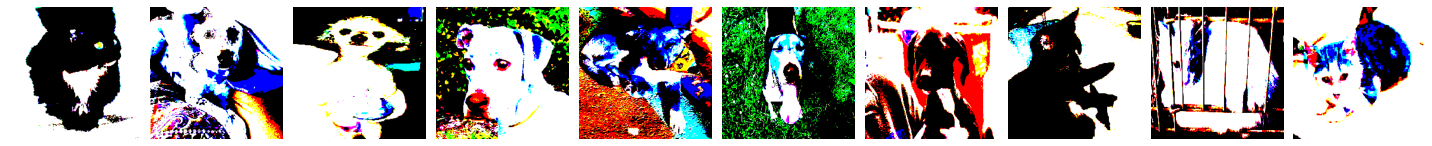

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters = 32 , kernel_size = (3,3) , activation = "relu" , padding = "same",input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2) , strides = 2),
    Conv2D(filters = 64 , kernel_size = (3,3) , activation = "relu" , padding = "same"),
    MaxPool2D(pool_size = (2,2) , strides = 2),
    Flatten(),
    Dense(units = 2 , activation = "softmax"),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3) , loss="categorical_crossentropy" , metrics=["accuracy"])

In [ ]:
model.fit(x = train_batches , validation_data=valid_batches , epochs = 10 , verbose =2)

Epoch 1/10
100/100 - 106s - loss: 44.4547 - accuracy: 0.5400 - val_loss: 0.7098 - val_accuracy: 0.5800
Epoch 2/10
100/100 - 114s - loss: 0.5502 - accuracy: 0.7370 - val_loss: 0.7307 - val_accuracy: 0.6150
Epoch 3/10
100/100 - 121s - loss: 0.3129 - accuracy: 0.8900 - val_loss: 0.8525 - val_accuracy: 0.6250
Epoch 4/10
100/100 - 120s - loss: 0.1275 - accuracy: 0.9670 - val_loss: 0.9585 - val_accuracy: 0.6050
Epoch 5/10
100/100 - 120s - loss: 0.0632 - accuracy: 0.9920 - val_loss: 1.1706 - val_accuracy: 0.6050
Epoch 6/10
100/100 - 119s - loss: 0.0260 - accuracy: 0.9960 - val_loss: 1.3301 - val_accuracy: 0.5800
Epoch 7/10
100/100 - 123s - loss: 0.0107 - accuracy: 0.9980 - val_loss: 1.5432 - val_accuracy: 0.6000
Epoch 8/10
100/100 - 125s - loss: 0.0055 - accuracy: 0.9990 - val_loss: 1.6083 - val_accuracy: 0.5900
Epoch 9/10
100/100 - 135s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 1.7062 - val_accuracy: 0.5900
Epoch 10/10
100/100 - 123s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.7826 -